In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy
import matplotlib.pyplot as plt
import sklearn
import sklearn.neural_network

In [2]:
WindData = pd.read_csv('HovsoreData_Sonic_100m_2004-2013.csv')

In [3]:
# Filter rows where 'Wsp' is less than or equal to 35 m/s
filtered_WindData = WindData[WindData['Wsp'] <= 35]

filtered_WindData.loc[filtered_WindData["TI"] <= 0.001] = np.nan

filtered_WindData = filtered_WindData.dropna()

# Save the filtered data to a new CSV file
filtered_csv_file = 'FilteredWindData.csv'
filtered_WindData.to_csv(filtered_csv_file, index=False)

WindData = filtered_WindData

In [4]:
U = WindData['Wsp']

In [5]:
Umean = np.mean(U)
Ustd = np.std(U)

n = len(U) # Count the number of samples


print("Umean = ", Umean)
print("Ustd = ", Ustd)
print("n = ", n)

Umean =  8.83891997435993
Ustd =  4.563811841180505
n =  429796


In [6]:
alpha =  1 - 0.95# Corresponding to 95% probability  ( alpha = 1-p)

In [7]:
Nbootstrap = 100 #99999
BootstrapSize = len(U)

Bsample = np.random.randint(low = 0, high = 8, size = (Nbootstrap,BootstrapSize))
BootstrapSample = np.zeros((Nbootstrap,BootstrapSize))
for i in range(Nbootstrap):
    for j in range(BootstrapSize):
        BootstrapSample[i,j] = U[Bsample[i,j]]
        
#BootstrapSample = 

BootstrapMeans = np.mean(BootstrapSample, axis=1)
BootstrapMeans = np.sort(BootstrapMeans)

Rlow = int((Nbootstrap+1) * (alpha/2) )
Rhigh = int((Nbootstrap+1) * (1-alpha/2))

CIn_B = BootstrapMeans[Rlow]
CIp_B = BootstrapMeans[Rhigh]

print('Confidence interval based on bootstrapping: [' + str(CIn_B) + ', ' + str(CIp_B) + ']')

KeyboardInterrupt: 

In [8]:
print("Fitting the environmental uncertainty variable 𝑋𝑊:")
print("Did you try bootstrapping directly on the data? What did you notice? The uncertainty likely depends on the")
print("bootstrap sample size (how many points you use in each bootstrap sample). In order to determine the right") 
print("bootstrap sample size, we should consider what the wind speed has certain long variation cycles (diurnal,") 
print("seasonal), hence shuffling the data may not be the most realistic way to determine the uncertainty as it") 
print("eliminates these long-term variations. The suggested approach is to take each bootstrap sample (or other") 
print("methodology) based on samples which take a continuous piece of the data (e.g. one continuous period at a") 
print("time), and the randomness is achieved by randomly shifting the starting point of the sample. What is the") 
print("minimum period duration you should consider?")

Fitting the environmental uncertainty variable 𝑋𝑊:
Did you try bootstrapping directly on the data? What did you notice? The uncertainty likely depends on the
bootstrap sample size (how many points you use in each bootstrap sample). In order to determine the right
bootstrap sample size, we should consider what the wind speed has certain long variation cycles (diurnal,
seasonal), hence shuffling the data may not be the most realistic way to determine the uncertainty as it
eliminates these long-term variations. The suggested approach is to take each bootstrap sample (or other
methodology) based on samples which take a continuous piece of the data (e.g. one continuous period at a
time), and the randomness is achieved by randomly shifting the starting point of the sample. What is the
minimum period duration you should consider?


In [11]:
from datetime import datetime


In [12]:
now = datetime.now()

start_time = now.strftime("%H:%M:%S")

print("Start of bootstrap: ", start_time)

Nbootstrap = 100 #99999  # How many times you wanna do this random act
#BootstrapSize = len(U)
#BootstrapMeans = np.mean(U)

N1year = int(1*365*24*6) # taking an interval for 1 year with 365 days with 24 hours with 6 times 10 minute intervals


#for i in range(N1year): # you take the range of this 1 year
    
# here you take a random sample and then use that sample to locate the next year
Yearsample = np.random.randint(low = 0, high = len(WindData) - N1year) #, size = (Nbootstrap,BootstrapSize))

print("Yearsample = ", Yearsample)

Winddata_1_year = WindData[Yearsample:Yearsample + N1year]
print("Winddata_1_year = ", Winddata_1_year)

#Bsample = np.random.randint(low = 0, high = 8, size = (Nbootstrap,BootstrapSize))
#Bsample = np.random.randint(low = 0, high = len(WindData) - N1year)

BootstrapSize = len(Winddata_1_year)

# now select the year in which we do the bootstrapping
BootstrapSample = np.zeros((Nbootstrap,BootstrapSize))

# now do bootstrapping over the chosen year
#for j in range(Nbootstrap):
#    # Extract a bootstrap sample using the indices from Bsample
#    bootstrap_indices = Bsample[j] + np.arange(BootstrapSize)
#    BootstrapSample[j, :] = Winddata[bootstrap_indices]
print("========================================================")
print("Starting Bootstrap...")
for i in range(Nbootstrap):
    print("i = ", i)
    for j in range(BootstrapSize):
        ##print("Winddata_1_year['Timestamp'].idxmin() = ",Winddata_1_year['Timestamp'].idxmin())
        ##print("Winddata_1_year['Timestamp'].idxmax() = ",Winddata_1_year['Timestamp'].idxmax())
        #Bsample = np.random.randint(low = Winddata_1_year['Timestamp'].idxmin(), high =Winddata_1_year['Timestamp'].idxmax())
        #print("Bsample = ",Bsample)
        
                # Initialize Bsample to be outside the valid range
        Bsample = np.random.randint(low = Winddata_1_year['Timestamp'].idxmin(), high =Winddata_1_year['Timestamp'].idxmax())
        #Bsample = -1
        
        # Keep generating a new random sample until it's a valid index
        while Bsample not in Winddata_1_year.index:
            #print("Wrong sample, i = ",i,", j = ", j)
            Bsample = np.random.randint(low=Winddata_1_year['Timestamp'].idxmin(), high=Winddata_1_year['Timestamp'].idxmax())
        
        ##print("Bsample =", Bsample)
        
        #print("Winddata_1_year = ", Winddata_1_year)
        #print(Winddata_1_year['Wsp', index = Bsample])
        #print(Winddata_1_year)
        #print(Winddata_1_year[Winddata_1_year['Timestamp'].idxmax()])
        ##print("Winddata_1_year.loc[Bsample, 'Wsp'] = ", Winddata_1_year.loc[Bsample, 'Wsp'])
        BootstrapSample[i,j] = Winddata_1_year.loc[Bsample, 'Wsp'] #Winddata_1_year['Wsp', index = Bsample]

print("DONE!!")
# repeat this process

#BootstrapSample[i,j] = U[Bsample[i,j]]
        
#BootstrapSample = 

BootstrapMeans = np.mean(BootstrapSample, axis=1)
BootstrapMeans = np.sort(BootstrapMeans)

Rlow = int((Nbootstrap+1) * (alpha/2) )
Rhigh = int((Nbootstrap+1) * (1-alpha/2))

CIn_B = BootstrapMeans[Rlow]
CIp_B = BootstrapMeans[Rhigh]

print('Confidence interval based on bootstrapping: [' + str(CIn_B) + ', ' + str(CIp_B) + ']')


now = datetime.now()

end_time = now.strftime("%H:%M:%S")

print("End of bootstrap: ", end_time)

print("+++++++++++++++++++++++++++++++++++++++++++++")
print("Duration of bootstrap: ", int(end_time.hour)-int(start_time.hour),":",int(end_time.minute)-int(start_time.minute),":",int(end_time.second)-int(start_time.second))

Start of bootstrap:  09:52:03
Yearsample =  355439
Winddata_1_year =             Timestamp     Wsp      TI  TI,detrend   MeanDir  MeanTrigDir  \
364405  2.012012e+11  8.6299  0.0496      0.0431  295.6617     295.6619   
364406  2.012012e+11  8.5771  0.0353      0.0348  297.4903     297.4903   
364407  2.012012e+11  9.2877  0.0336      0.0335  290.9002     290.9002   
364408  2.012012e+11  9.1631  0.0469      0.0369  287.4657     287.4658   
364409  2.012012e+11  9.5148  0.0483      0.0323  285.3507     285.3506   
...              ...     ...     ...         ...       ...          ...   
417218  2.013031e+11  1.9695  0.2909      0.2632  189.7456     190.0128   
417219  2.013031e+11  2.0055  0.3285      0.3191  185.8268     186.4898   
417220  2.013031e+11  2.2692  0.2625      0.2625  190.2589     190.3536   
417221  2.013031e+11  2.6258  0.2558      0.2364  191.1484     191.3315   
417222  2.013031e+11  3.3420  0.1606      0.1377  194.0485     194.0321   

         StdDir    MinDir   M

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [13]:
print(Winddata_1_year)

           Timestamp     Wsp      TI  TI,detrend   MeanDir  MeanTrigDir  \
364405  2.012012e+11  8.6299  0.0496      0.0431  295.6617     295.6619   
364406  2.012012e+11  8.5771  0.0353      0.0348  297.4903     297.4903   
364407  2.012012e+11  9.2877  0.0336      0.0335  290.9002     290.9002   
364408  2.012012e+11  9.1631  0.0469      0.0369  287.4657     287.4658   
364409  2.012012e+11  9.5148  0.0483      0.0323  285.3507     285.3506   
...              ...     ...     ...         ...       ...          ...   
417218  2.013031e+11  1.9695  0.2909      0.2632  189.7456     190.0128   
417219  2.013031e+11  2.0055  0.3285      0.3191  185.8268     186.4898   
417220  2.013031e+11  2.2692  0.2625      0.2625  190.2589     190.3536   
417221  2.013031e+11  2.6258  0.2558      0.2364  191.1484     191.3315   
417222  2.013031e+11  3.3420  0.1606      0.1377  194.0485     194.0321   

         StdDir    MinDir   MaxDir  
364405   1.8246  286.7070  301.256  
364406   1.7448  291.1990

In [14]:
# Confidence intervals using directly the Standard Normal distribution
k_alpha = stats.norm.ppf(alpha/2)
k_alpha_p = - stats.norm.ppf(1-alpha/2)

CIn_N = Umean + k_alpha * (Ustd/(np.sqrt(n)))
CIp_N = Umean - k_alpha * (Ustd/(np.sqrt(n)))

print('Confidence interval based on the Normal distribution: [' + str(CIn_N) + ', ' + str(CIp_N) + ']')

Confidence interval based on the Normal distribution: [8.825275882420442, 8.852564066299418]


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

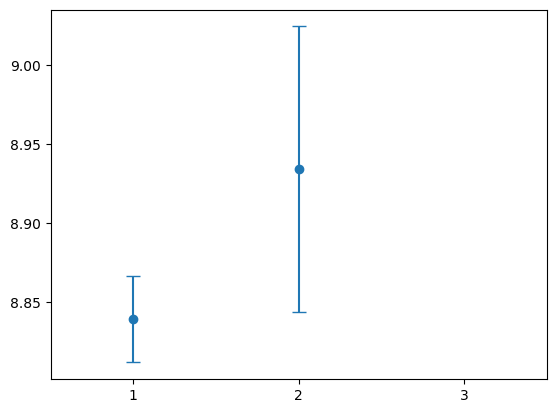

In [15]:
# Plot errorbars
fig0, ax0 = plt.subplots()
ax0.errorbar([1, 2], [Umean, np.mean(BootstrapMeans)],
             yerr = [(CIp_N - CIn_N), (CIp_B - CIn_B)],
            linestyle = '',marker = 'o',capsize = 5)
ax0.set_xlim([0.5,3.5])
ax0.set_xticks([1,2,3])
ax0.set_xticklabels(['Normal dist.','Bootstrapping'])
ax0.set_ylabel('Annual mean wind speed [m/s]')
plt.show()

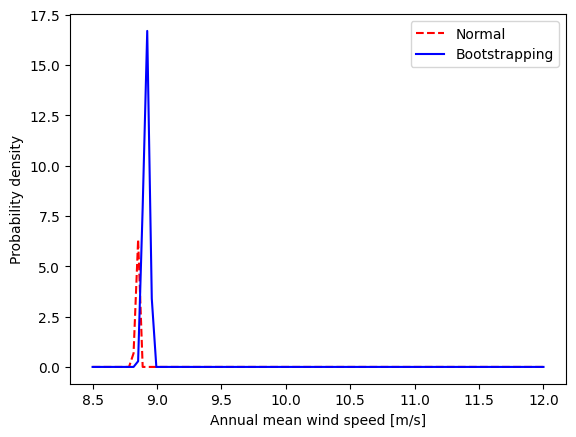

In [16]:
# Plot pdfs

Ubins = np.linspace(8.5,12,100)

pdf_N = stats.norm.pdf(Ubins,Umean,Ustd/np.sqrt(n))
dU = Ubins[1]-Ubins[0] # Scaling factor for the t-pdf to make sure we get a valid pdf for every bin spacing
pdf_T = (1/np.sqrt(dU))*stats.t.pdf((Ubins - Umean)/(Ustd/np.sqrt(n)), n - 1)

# Generating an empirical pdf from the bootstrap sample
BootstrapHist = np.histogram(BootstrapMeans,bins = Ubins)
BootstrapDist = stats.rv_histogram(BootstrapHist)
pdf_B = BootstrapDist.pdf(Ubins)

fig1, ax1 = plt.subplots()
p11 = ax1.plot(Ubins,pdf_N,'--r', label = 'Normal')
p12 = ax1.plot(Ubins,pdf_B,'-b', label = 'Bootstrapping')
plt.xlabel('Annual mean wind speed [m/s]')
plt.ylabel('Probability density')
plt.legend()

plt.show()